# import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Instruction
* air_quality_no2_long.csv, air_quality_pm25_long.csv 파일을 읽고, 데이터프레임을 생성하기
* 두 개의 데이터프레임을 합치기

# Data I

## Load Data I

In [3]:
#> 공기중 NO2의 농도를 3개 도시에서 1시간 간격으로 측정한 데이터
no2_file = 'https://github.com/pandas-dev/pandas/raw/master/doc/data/air_quality_no2_long.csv'
no2_df = pd.read_csv(no2_file)

## Data Structure I

In [4]:
no2_df.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00+00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00+00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00+00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00+00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00+00:00,FR04014,no2,21.4,µg/m³


In [5]:
no2_df['city'].unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [6]:
no2_df['country'].unique()

array(['FR', 'BE', 'GB'], dtype=object)

In [7]:
no2_df['location'].unique()

array(['FR04014', 'BETR801', 'London Westminster'], dtype=object)

In [8]:
no2_df.dtypes

city          object
country       object
date.utc      object
location      object
parameter     object
value        float64
unit          object
dtype: object

## 데이터 타입 변환 I

In [9]:
# data.utc 컬럼의 데이터타입을 문자열 타입에서 datetime64타입으로 변환
no2_df['date.utc'] = no2_df['date.utc'].astype('datetime64')
no2_df.dtypes

city                 object
country              object
date.utc     datetime64[ns]
location             object
parameter            object
value               float64
unit                 object
dtype: object

## London 시간대별 No2 농도그래프 시각화

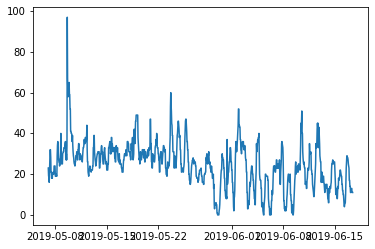

In [10]:
london = no2_df[no2_df['city'] == 'London']
plt.plot('date.utc', 'value', data = london)
plt.show()

# Data II

## Load Data II

In [11]:
#> 지름이 2.5um 이하인 미세먼지의 공기중 농도를 2개의 도시에서 1시간 간격으로 측정한 데이터프레임
pm25_file = 'https://github.com/pandas-dev/pandas/raw/master/doc/data/air_quality_pm25_long.csv'
pm25_df = pd.read_csv(pm25_file)

## Data Structure II

In [12]:
pm25_df.head()

,city,country,date.utc,location,parameter,value,unit
0,Antwerpen,BE,2019-06-18 06:00:00+00:00,BETR801,pm25,18.0,µg/m³
1,Antwerpen,BE,2019-06-17 08:00:00+00:00,BETR801,pm25,6.5,µg/m³
2,Antwerpen,BE,2019-06-17 07:00:00+00:00,BETR801,pm25,18.5,µg/m³
3,Antwerpen,BE,2019-06-17 06:00:00+00:00,BETR801,pm25,16.0,µg/m³
4,Antwerpen,BE,2019-06-17 05:00:00+00:00,BETR801,pm25,7.5,µg/m³


In [13]:
pm25_df.tail()

,city,country,date.utc,location,parameter,value,unit
1105,London,GB,2019-05-07 06:00:00+00:00,London Westminster,pm25,9.0,µg/m³
1106,London,GB,2019-05-07 04:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1107,London,GB,2019-05-07 03:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1108,London,GB,2019-05-07 02:00:00+00:00,London Westminster,pm25,8.0,µg/m³
1109,London,GB,2019-05-07 01:00:00+00:00,London Westminster,pm25,8.0,µg/m³


In [14]:
pm25_df.shape

(1110, 7)

In [15]:
pm25_df['city'].unique()

array(['Antwerpen', 'London'], dtype=object)

In [16]:
pm25_df['country'].unique()

array(['BE', 'GB'], dtype=object)

In [17]:
pm25_df['location'].unique()

array(['BETR801', 'London Westminster'], dtype=object)

In [18]:
pm25_df.dtypes

city          object
country       object
date.utc      object
location      object
parameter     object
value        float64
unit          object
dtype: object

## 데이터 타입 변환 II

In [19]:
pm25_df['date.utc'] = pm25_df['date.utc'].astype('datetime64')
pm25_df.dtypes

city                 object
country              object
date.utc     datetime64[ns]
location             object
parameter            object
value               float64
unit                 object
dtype: object

## London의 pm2.5 농도 시각화

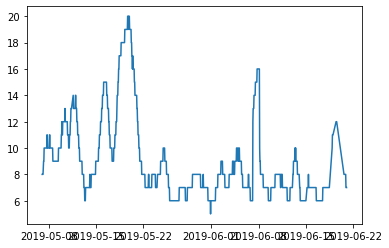

In [20]:
london = pm25_df[pm25_df['city'] == 'London']
plt.plot('date.utc', 'value', data = london)
plt.show()

# Concat : Air Quality

## Data concat & Structure

In [21]:
air_quality = pd.concat([no2_df, pm25_df], axis = 0, ignore_index = True)

In [22]:
air_quality.head()

,city,country,date.utc,location,parameter,value,unit
0,Paris,FR,2019-06-21 00:00:00,FR04014,no2,20.0,µg/m³
1,Paris,FR,2019-06-20 23:00:00,FR04014,no2,21.8,µg/m³
2,Paris,FR,2019-06-20 22:00:00,FR04014,no2,26.5,µg/m³
3,Paris,FR,2019-06-20 21:00:00,FR04014,no2,24.9,µg/m³
4,Paris,FR,2019-06-20 20:00:00,FR04014,no2,21.4,µg/m³


In [23]:
air_quality.tail()

,city,country,date.utc,location,parameter,value,unit
3173,London,GB,2019-05-07 06:00:00,London Westminster,pm25,9.0,µg/m³
3174,London,GB,2019-05-07 04:00:00,London Westminster,pm25,8.0,µg/m³
3175,London,GB,2019-05-07 03:00:00,London Westminster,pm25,8.0,µg/m³
3176,London,GB,2019-05-07 02:00:00,London Westminster,pm25,8.0,µg/m³
3177,London,GB,2019-05-07 01:00:00,London Westminster,pm25,8.0,µg/m³


In [24]:
air_quality.shape

(3178, 7)

In [25]:
air_quality['city'].unique()

array(['Paris', 'Antwerpen', 'London'], dtype=object)

In [26]:
air_quality['location'].unique()

array(['FR04014', 'BETR801', 'London Westminster'], dtype=object)

In [27]:
air_quality['parameter'].unique()

array(['no2', 'pm25'], dtype=object)

## 시각화

### seaborn 사용 시

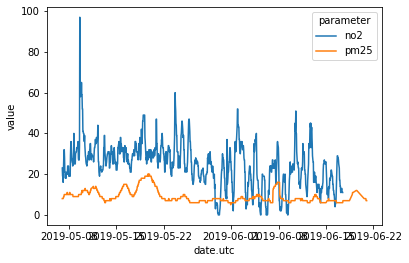

In [28]:
# air_quality 데이터프레임에서 london의 No2 변화, pm2.5 변화 그래프
sns.lineplot(data = air_quality[air_quality['city'] == 'London'],
            x = 'date.utc', y = 'value', hue = 'parameter')
plt.show()

### matplotlib 사용 시

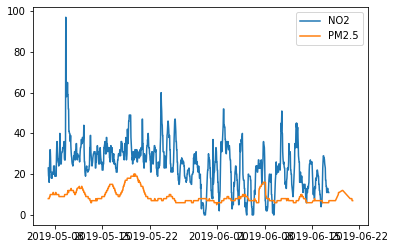

In [30]:
london_no2 = air_quality[(air_quality['city'] == 'London') & (air_quality['parameter'] == 'no2')]
london_pm25 = air_quality[(air_quality['city'] == 'London') & (air_quality['parameter'] == 'pm25')]

plt.plot('date.utc', 'value', data = london_no2, label = 'NO2')
plt.plot('date.utc', 'value', data = london_pm25, label = 'PM2.5')

plt.legend()
plt.show()

# Data III

* air_quality_stations.csv 파일을 읽어 데이터프레임을 생성
* qir_quality 데이터프레임과 합치기

## Load Data III

In [31]:
stations_file = 'https://github.com/pandas-dev/pandas/raw/master/doc/data/air_quality_stations.csv'
stations = pd.read_csv(stations_file)

## Data Structure III

In [32]:
stations.head()

,location,coordinates.latitude,coordinates.longitude
0,BELAL01,51.23619,4.38522
1,BELHB23,51.17030,4.34100
2,BELLD01,51.10998,5.00486
3,BELLD02,51.12038,5.02155
4,BELR833,51.32766,4.36226


In [33]:
stations.tail()

,location,coordinates.latitude,coordinates.longitude
61,Southend-on-Sea,51.54420,0.67841
62,Southwark A2 Old Kent Road,51.48050,-0.05955
63,Thurrock,51.47707,0.31797
64,Tower Hamlets Roadside,51.52253,-0.04216
65,Groton Fort Griswold,41.35360,-72.07890


In [35]:
stations.dtypes

location                  object
coordinates.latitude     float64
coordinates.longitude    float64
dtype: object

In [36]:
# stations 데이터프레임에서 location이 FR로 시작하는 모든 레코드 선택
stations[stations['location'].str.startswith('FR')]

,location,coordinates.latitude,coordinates.longitude
24,FR04004,48.89167,2.34667
25,FR04012,48.82778,2.32750
26,FR04014,48.83724,2.39390
27,FR04014,48.83722,2.39390
28,FR04031,48.86887,2.31194
29,FR04031,48.86889,2.31194
30,FR04037,48.82861,2.36028
31,FR04060,48.85720,2.29330
32,FR04071,48.85640,2.33528
33,FR04071,48.85639,2.33528


# Merge : Air Qualith + Stations 

In [37]:
result = pd.merge(left = air_quality, right = stations, how = 'inner', on = 'location')

In [38]:
result.head(10)

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
0,Paris,FR,2019-06-21 00:00:00,FR04014,no2,20.0,µg/m³,48.83724,2.3939
1,Paris,FR,2019-06-21 00:00:00,FR04014,no2,20.0,µg/m³,48.83722,2.3939
2,Paris,FR,2019-06-20 23:00:00,FR04014,no2,21.8,µg/m³,48.83724,2.3939
3,Paris,FR,2019-06-20 23:00:00,FR04014,no2,21.8,µg/m³,48.83722,2.3939
4,Paris,FR,2019-06-20 22:00:00,FR04014,no2,26.5,µg/m³,48.83724,2.3939
5,Paris,FR,2019-06-20 22:00:00,FR04014,no2,26.5,µg/m³,48.83722,2.3939
6,Paris,FR,2019-06-20 21:00:00,FR04014,no2,24.9,µg/m³,48.83724,2.3939
7,Paris,FR,2019-06-20 21:00:00,FR04014,no2,24.9,µg/m³,48.83722,2.3939
8,Paris,FR,2019-06-20 20:00:00,FR04014,no2,21.4,µg/m³,48.83724,2.3939
9,Paris,FR,2019-06-20 20:00:00,FR04014,no2,21.4,µg/m³,48.83722,2.3939


In [39]:
result.tail(10)

,city,country,date.utc,location,parameter,value,unit,coordinates.latitude,coordinates.longitude
4172,London,GB,2019-05-07 11:00:00,London Westminster,pm25,10.0,µg/m³,51.49467,-0.13193
4173,London,GB,2019-05-07 10:00:00,London Westminster,pm25,10.0,µg/m³,51.49467,-0.13193
4174,London,GB,2019-05-07 09:00:00,London Westminster,pm25,10.0,µg/m³,51.49467,-0.13193
4175,London,GB,2019-05-07 08:00:00,London Westminster,pm25,10.0,µg/m³,51.49467,-0.13193
4176,London,GB,2019-05-07 07:00:00,London Westminster,pm25,9.0,µg/m³,51.49467,-0.13193
4177,London,GB,2019-05-07 06:00:00,London Westminster,pm25,9.0,µg/m³,51.49467,-0.13193
4178,London,GB,2019-05-07 04:00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
4179,London,GB,2019-05-07 03:00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
4180,London,GB,2019-05-07 02:00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
4181,London,GB,2019-05-07 01:00:00,London Westminster,pm25,8.0,µg/m³,51.49467,-0.13193
